In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
import numpy as np

Using TensorFlow backend.


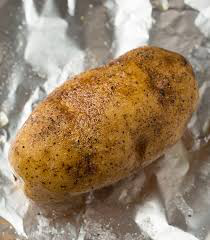

In [5]:
Image.open('/kaggle/input/waste-classification-data/dataset/DATASET/TEST/O/O_13003.jpg')

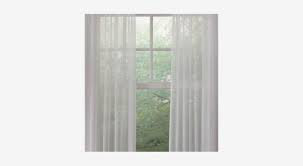

In [7]:
Image.open('/kaggle/input/waste-classification-data/dataset/DATASET/TEST/R/R_10007.jpg')

In [8]:
# Initialising the CNN
classifier = Sequential()


classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3),
                      activation = 'relu'))
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/kaggle/input/waste-classification-data/dataset/DATASET/TEST',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [12]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 706,
                         epochs = 4,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/4
706/706 [==============================] - 376s 533ms/step - loss: 0.4426 - accuracy: 0.8031 - val_loss: 0.4636 - val_accuracy: 0.8710
Epoch 2/4
706/706 [==============================] - 190s 269ms/step - loss: 0.3874 - accuracy: 0.8296 - val_loss: 0.3309 - val_accuracy: 0.8649
Epoch 3/4
706/706 [==============================] - 186s 264ms/step - loss: 0.3514 - accuracy: 0.8507 - val_loss: 0.1943 - val_accuracy: 0.8934
Epoch 4/4
706/706 [==============================] - 193s 274ms/step - loss: 0.3190 - accuracy: 0.8669 - val_loss: 0.3257 - val_accuracy: 0.8905


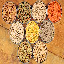

In [21]:
# organic image
test_image = image.load_img('/kaggle/input/waste-classification-data/dataset/DATASET/TEST/O/O_13207.jpg',
                            target_size = (64, 64))
test_image

In [17]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

In [18]:
training_set.class_indices

{'O': 0, 'R': 1}

In [19]:
if result[0][0] == 1:
    prediction = 'Recyclable'
else:
    prediction = 'Organic'

In [20]:
prediction

'Organic'